#Support Vector Binary Classification of Disease State with Cycle Averaged Sensor Data
##Input Data: 15 sensor map of the cardiac cycle over a 1 second period ($15\times2000$)

##Investigation of:
* Classifier prediction performance.
* Out of sample prediction error.
* The effect of kernel choice: Linear, Polynomial, RBF.
* The effect of subsampling the time series. From 2000 down to $\sim$200 in steps.

**Daniel Wilson and John Mooney**

In [1]:
#Healthy defined as 0
#Unhealthy defined as 1

In [2]:
import mlpy.wavelet
import mcg
import numpy as np
import datetime
import timeit
import time
import copy
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import time
import gc
from matplotlib.mlab import PCA
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
from sklearn import svm
from sklearn import preprocessing
#matplotlib

mcg.deviceID = 'mk1'
mcg.setDeviceID()

#%matplotlib inline
from skimage.feature import match_template

alphaPlus
mk1


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#Load data

## 6060

In [3]:
path60  = '/home/john/Dropbox/Mubashir/6060DataFrame.pkl'
df60 = pd.read_pickle(path60)

#Randomly shuffle lst
df60 = df60.iloc[np.random.permutation(len(df60))]

X = df60['Coil Data'].values.tolist()

#checking to see if there are any floats, caused by the Nans, should still have 120
#X = lst['CoilData'].values.tolist()
for i, x in enumerate(X):
    #print i,type(x)
    if type(x)==float:
        
        print x
        index = []
        index.extend([i])
        #print index
        #X = np.delete(X,index)
print len(X)


#Cutting the readings down to 2000
for i, x in enumerate(X):
    #print 'a', X[i].shape
    X[i] = x.T[0:2000].T
    #print 'b', X[i].shape
    
#flattening X
for i, x in enumerate(X):
    X[i]= x.flatten()
    
#normalising the data, set 0 as mean value
X = preprocessing.scale(X) #CoilData

400


In [4]:
#creating a list of classes
le = preprocessing.LabelEncoder()

y = df60['Classification'].values.tolist()
le.fit(y)
y = le.transform(y)
print y.shape

(400,)


## Subsampling the data to reduce the dimensionality (quickly prototype mc hyperparams)

In [99]:
#normalising the data, set 0 as mean value
val = X #preprocessing.scale(X) #CoilData

every=40
#print every
#X = val
subsampled=[]#copy.copy(val)
for i, x in enumerate(val):
    subsampled.append(x.T[::every].T)
    #subsampled[i]=(x.T[::every].T)
    
subsampled40 = np.asarray(subsampled)

In [108]:
clf = svm.SVC(kernel="rbf", probability = True, cache_size = 2000, class_weight = 'balanced')

gamma_range40 = np.linspace(0.05, 0.000001, 8)
c_range40 = np.linspace(0.01, 20, 8)
param_grid40 = dict(gamma = gamma_range40, C = c_range40)
#param_grid['kernel'] =['rbf']
#print param_grid

CV = cross_validation.StratifiedKFold(y, n_folds=5, shuffle = True)

grid40 = GridSearchCV(clf, param_grid40, cv=CV, scoring="accuracy", n_jobs=1)
#grid = RandomizedSearchCV(clf, param_grid, cv=CV, scoring="accuracy", n_iter=10)

%time grid40.fit(subsampled40, y)

CPU times: user 1min 49s, sys: 7.58 ms, total: 1min 49s
Wall time: 1min 49s


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 1 ..., 0 0], n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=2000, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   2.86571e+00,   5.72143e+00,   8.57714e+00,
         1.14329e+01,   1.42886e+01,   1.71443e+01,   2.00000e+01]), 'gamma': array([  5.00000e-02,   4.28573e-02,   3.57146e-02,   2.85719e-02,
         2.14291e-02,   1.42864e-02,   7.14371e-03,   1.00000e-06])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

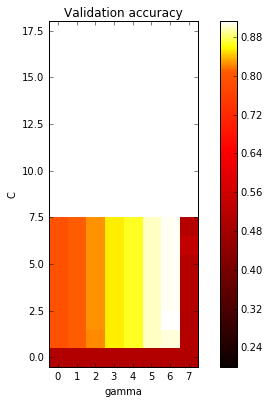

0.9125
{'C': 5.7214285714285706, 'gamma': 0.007143714285714288}
[ 0.92592593  0.9         0.9125      0.925       0.89873418]
Accuracy: 0.91 (+/- 0.02)
sensitivity:  1.0 spec:  0.85
sensitivity:  1.0 spec:  0.794871794872
sensitivity:  0.926829268293 spec:  0.897435897436
sensitivity:  0.90243902439 spec:  0.948717948718
sensitivity:  0.925 spec:  0.871794871795
Mean sensitivity is 0.950853658537
Mean specificity is 0.872564102564
246 [137 109]


In [109]:
plot_gridsearch(grid40, c_range40, gamma_range40)

accuracy, err, mean_sen, mean_spec, sen_list, spec_list, SV = evaluate_gridsearch(subsampled40, y, grid40,
                                                                                  CV)

#SVC

In [88]:
import random
from sklearn.grid_search import GridSearchCV #optimizing gamma and c
from sklearn.grid_search import RandomizedSearchCV #optimizing gamma and c
from sklearn import cross_validation
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from scipy import interp
import scipy

In [6]:
%matplotlib inline

# Exhaustive Gridsearch, visualising the fitness landscape

In [37]:
clf = svm.SVC(kernel="rbf", probability = True, cache_size = 2000, class_weight = 'balanced')

gamma_range = np.linspace(0.05, 0.000001, 400)
c_range = np.linspace(0.01, 20, 240)
param_grid = dict(gamma = gamma_range, C = c_range)
#param_grid['kernel'] =['rbf']
#print param_grid

CV = cross_validation.StratifiedKFold(y, n_folds=5, shuffle = True)

grid = GridSearchCV(clf, param_grid, cv=CV, scoring="accuracy", n_jobs=6)
#grid = RandomizedSearchCV(clf, param_grid, cv=CV, scoring="accuracy", n_iter=10)

%time grid.fit(subsampled, y)

CPU times: user 1h 12min 17s, sys: 1min 57s, total: 1h 14min 15s
Wall time: 23h 3min 44s


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 1 ..., 0 0], n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=2000, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=6,
       param_grid={'C': array([  1.00000e-02,   9.36402e-02, ...,   1.99164e+01,   2.00000e+01]), 'gamma': array([  5.00000e-02,   4.98747e-02, ...,   1.26311e-04,   1.00000e-06])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [98]:
subsampled.shape

(400, 750)

In [131]:
print gamma_range[0]
print gamma_range[-1]

0.05
1e-06


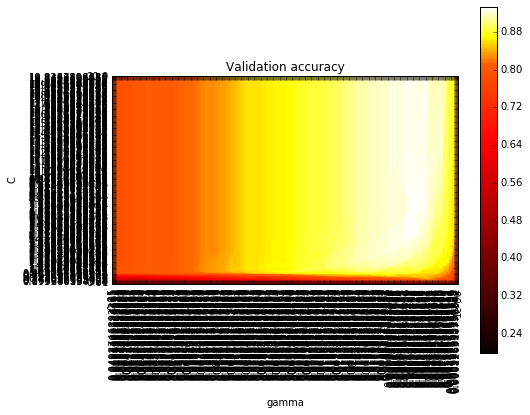

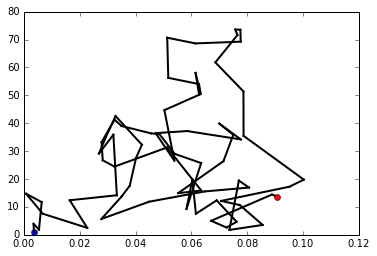

In [133]:
fig = plot_gridsearch(grid, c_range, gamma_range)
fig=plt.figure()
plot_traj(fig, step_list)
plt.show()
#accuracy, err, mean_sen, mean_spec, sen_list, spec_list, SV = evaluate_gridsearch(subsampled, y, grid, CV)

4.44292887029 0.00726902506266


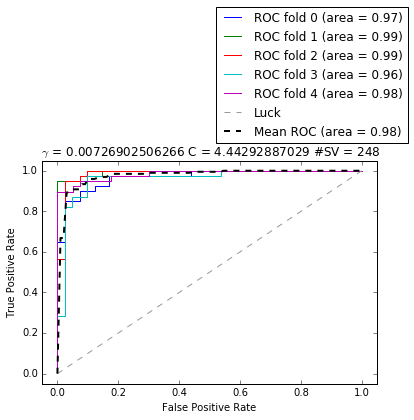

In [91]:
C = grid.best_params_['C']
gamma = grid.best_params_['gamma']
print C, gamma
clf.C = C
clf.gamma = gamma
pr_lst, mean_tpr, mean_fpr, mean_auc = ROC_data(subsampled, y, clf, CV)
fig, ax = plt.subplots()
ax = ROC_plot(ax, pr_lst,mean_tpr,mean_fpr,mean_auc,C,gamma,SV)
plt.show()

In [113]:
plot_gridsearch(grid)

evaluate_gridsearch(subsampled, y, grid, CV)

TypeError: plot_gridsearch() takes exactly 3 arguments (1 given)

# Monte Carlo Search

In [30]:
beta_min=1
beta_max=pow(10,3)
n_iter=100

## Exponential Decrease

In [ ]:
%time current, current_fitness, step_list = mcsearch(subsampled, y, clf, CV, beta_min=beta_min, beta_max=beta_max, n_iter=n_iter, epsilon_C=5, epsilon_gamma=0.001,n_jobs=7, init_range=[1,0.005])

## x^2 temperature decrease

### Search

In [28]:
%time current, current_fitness, step_list = mcsearch(subsampled, y, clf, CV, beta_min=beta_min, beta_max=beta_max, n_iter=n_iter, epsilon_C=5, epsilon_gamma=0.001,n_jobs=7, init_range=[1,0.005])

n_acc, step, frac_acc  2.0 2 1
{'beta': 1.1020304050607082, 'epsilon_gamma': 0.0005, 'step': 2, 'frac_acc': 1, 'fitness': 0.21235583684950776, 'C': 3.931287271049586, 'gamma': 0.0034279462333437595, 'epsilon_C': 2.5}
n_acc, step, frac_acc  3.0 3 1.0
{'beta': 1.4081216202428324, 'epsilon_gamma': 0.001, 'step': 3, 'frac_acc': 1.0, 'fitness': 0.22726324425691513, 'C': 1.8510891692611149, 'gamma': 0.005384925038275971, 'epsilon_C': 5.0}
n_acc, step, frac_acc  4.0 4 1.0
{'beta': 1.918273645546373, 'epsilon_gamma': 0.002, 'step': 4, 'frac_acc': 1.0, 'fitness': 0.18497929363963128, 'C': 11.708671592503844, 'gamma': 0.00636370133542225, 'epsilon_C': 10.0}
n_acc, step, frac_acc  5.0 5 1.0
{'beta': 2.6324864809713295, 'epsilon_gamma': 0.004, 'step': 5, 'frac_acc': 1.0, 'fitness': 0.23745155493045778, 'C': 14.732403687492692, 'gamma': 0.0007479006427296101, 'epsilon_C': 10}
n_acc, step, frac_acc  6.0 6 1.0
{'beta': 3.550760126517702, 'epsilon_gamma': 0.008, 'step': 6, 'frac_acc': 1.0, 'fitness': 

### Plot

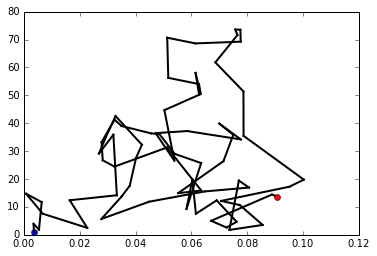

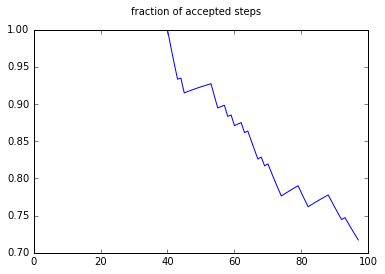

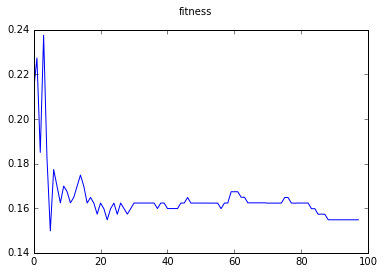

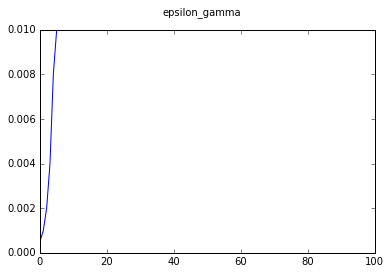

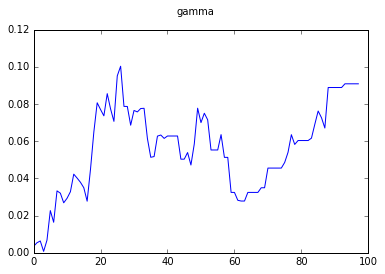

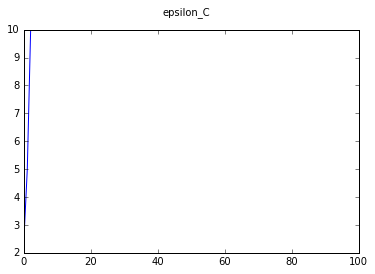

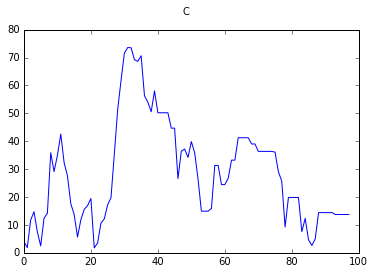

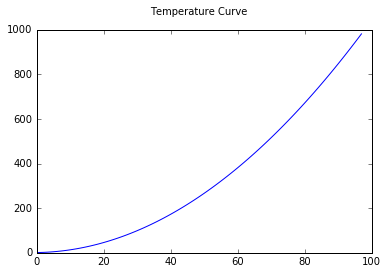

In [31]:
plot_optimser_performance(step_list, beta_min=1, beta_max=pow(10,3))

## MC functions

In [39]:
def mcsearch(X, y, clf, CV, beta_min, beta_max, n_iter, epsilon_C, epsilon_gamma, n_jobs=4, init_range=[100,0.05]):
    ##initialise
    n_accepted = 1.0
    step_list=[]
    epsilon_C_min = 0.1
    epsilon_C_max = 10
    epsilon_gamma_min = 1e-7 
    epsilon_gamma_max = 0.01
    fraction_acc_ideal = 0.5
    fraction_acc = 0.0
    
    current = (random.uniform(0.1,init_range[0]), random.uniform(0, init_range[1]))
    clf.C = current[0]
    clf.gamma = current[1]
    fitness_current = 1 - cross_validation.cross_val_score(clf, X, y, cv=CV, n_jobs=n_jobs).mean()
    step_list.append({'step':1, 'C':current[0], 'gamma':current[1], 'fitness':fitness_current, 'frac_acc':1.0})
    #step_list = [{'step':0, 'C':current[0], 'gamma':current[1], 'fitness':fitness_current}]
    #Loop
    for step in range(2, n_iter):
        beta = beta_min * pow(beta_max/beta_min,(float(step)-1)/(float(n_iter)-1))
        #beta = beta_min + beta_max*(float(step)-1)/(float(n_iter)-1)
        #beta = beta_min + beta_max*pow((float(step)-1)/(float(n_iter)-1),2)
        
        scaling_factor = abs(fraction_acc - fraction_acc_ideal)
        if fraction_acc > fraction_acc_ideal:
            epsilon_C = epsilon_C/scaling_factor
            epsilon_gamma = epsilon_gamma/scaling_factor
        else:
            epsilon_C = epsilon_C*scaling_factor
            epsilon_gamma = epsilon_gamma*scaling_factor
        
        if epsilon_gamma < epsilon_gamma_min:
            epsilon_gamma = epsilon_gamma_min
        elif epsilon_gamma > epsilon_gamma_max:
            epsilon_gamma = epsilon_gamma_max
        if epsilon_C < epsilon_C_min:
            epsilon_C = epsilon_C_min
        elif epsilon_C > epsilon_C_max:
            epsilon_C = epsilon_C_max
        
        
        
        proposed = generateMove(current, epsilon_C, epsilon_gamma) 
        clf.C = proposed[0]
        clf.gamma = proposed[1]
        fitness_proposed = 1 - cross_validation.cross_val_score(clf, X, y, cv=CV, n_jobs=n_jobs).mean()
    
        #cost
        relative_fitness = fitness_proposed - fitness_current
        if relative_fitness < 0:
            current = proposed
            fitness_current = fitness_proposed
            n_accepted += 1
        elif np.log(random.random()) <= -1* beta * relative_fitness:
            current = proposed
            fitness_current = fitness_proposed
            n_accepted += 1
        
        
        fraction_acc = float(n_accepted)/float(step)
        if step <= 2:
            fraction_acc = 1
            
        print "n_acc, step, frac_acc ", n_accepted, step, fraction_acc
        
        

        
        step_stats = {'step':step, 'C':current[0], 'gamma':current[1], 
                          'fitness':fitness_current, 'frac_acc':fraction_acc, 
                          'epsilon_C':epsilon_C, 'epsilon_gamma':epsilon_gamma,
                         'beta':beta}
        step_list.append(step_stats)
        print step_stats
     
    return current, fitness_current, step_list
    

def generateMove(current, epsilon_C, epsilon_gamma):
    C = abs(random.gauss(current[0], epsilon_C))
    gamma = abs(random.gauss(current[1], epsilon_gamma))
    return (C, gamma)

In [116]:
def plot_traj(fig, step_list):
    #fig=plt.figure()

    C_p = step_list[0]['C']
    gamma_p = step_list[0]['gamma']
    plt.plot(gamma_p, C_p, 'bo')

    for step_dict in step_list:
        C = step_dict['C']
        gamma = step_dict['gamma']
        #print C, gamma

        plt.plot([gamma_p, gamma],[C_p, C], 'k-', lw=2)

        C_p = C
        gamma_p = gamma

    plt.plot(gamma_p, C_p, 'ro') 
    return fig
    
def mc_list(step_list):

    frac_acc_list = []
    C_list = []
    gamma_list = []
    fitness_list = []
    epsilon_C_list = [] 
    epsilon_gamma_list = []

    for step_dict in step_list[1:]:
        frac_acc_list.append(step_dict['frac_acc'])
        fitness_list.append(step_dict['fitness'])
        C_list.append(step_dict['C'])
        gamma_list.append(step_dict['gamma'])
        epsilon_C_list.append(step_dict['epsilon_C'])
        epsilon_gamma_list.append(step_dict['epsilon_gamma'])
        
    return frac_acc_list, C_list, gamma_list, fitness_list, epsilon_C_list, epsilon_gamma_list
    
def plot_optimser_performance(step_list, beta_min, beta_max):
    plot_traj(step_list)
    
    frac_acc_list, C_list, gamma_list, fitness_list, epsilon_C_list, epsilon_gamma_list = mc_list(step_list)
    fig=plt.figure()
    plt.suptitle('fraction of accepted steps')
    plt.plot(frac_acc_list)
    fig=plt.figure()
    plt.suptitle('fitness')
    plt.plot(fitness_list)
    
    fig=plt.figure()
    plt.suptitle('epsilon_gamma')
    plt.plot(epsilon_gamma_list)
    
    fig=plt.figure()
    plt.suptitle('gamma')
    plt.plot(gamma_list)
    
    fig=plt.figure()
    plt.suptitle('epsilon_C')
    plt.plot(epsilon_C_list)
    fig=plt.figure()
    plt.suptitle('C')
    plt.plot(C_list)
    
    plot_tempcurve(beta_min, beta_max, n_iter)
    
def plot_tempcurve(beta_min, beta_max, n_iter):
    beta_list=[]

    for step in range(2, n_iter):
        #beta = beta_min * pow(beta_max/beta_min,(float(step)-1)/(float(n_iter)-1))
        #beta = beta_min + beta_max*(float(step)-1)/(float(n_iter)-1)
        beta = beta_min + beta_max*pow((float(step)-1)/(float(n_iter)-1),2)
        beta_list.append(beta)
        #print beta
    fig=plt.figure()
    plt.suptitle("Temperature Curve")
    plt.plot(beta_list)
    

In [127]:
def plot_gridsearch(grid, c_range, gamma_range):
    scores = [x[1] for x in grid.grid_scores_]
    scores = np.array(scores).reshape(len(c_range), len(gamma_range))

    np.save('gridsearchscores_full.npy', scores)

    class MidpointNormalize(Normalize):

        def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
            self.midpoint = midpoint
            Normalize.__init__(self, vmin, vmax, clip)

        def __call__(self, value, clip=None):
            x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
            return np.ma.masked_array(np.interp(value, x, y))


    fig = plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.81),origin='lower')#, extent=[0,len(gamma_range),0,len(c_range)])
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    
    plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=90)
    plt.yticks(np.arange(len(c_range)), c_range)
    #x_res = gamma_range[-1]/10
    #y_res = c_range[-1]/10
    #plt.yticks(np.arange(c_range[0], c_range[-1], y_res))
    
    #max_yticks = 10
    #yloc = plt.MaxNLocator(max_yticks)
    #fig.gca().yaxis.set_major_locator(yloc)
    
    
    #plt.locator_params(nbins=x_res)
    #plt.xticks(np.arange(gamma_range[0], gamma_range[-1], x_res), rotation=90)
    
    
    plt.title('Validation accuracy')
    #plt.show()
    return fig


def evaluate_gridsearch(val, y, grid, CV):
    print grid.best_score_
    print grid.best_params_
    #print grid.grid_scores_[79][1]
    #optimum clf here,with the best params

    clf = svm.SVC(kernel="rbf" , probability = True, cache_size = 1200, class_weight = "balanced" ,
                  C = grid.best_params_['C'], gamma = grid.best_params_['gamma'])

    #nested cross validation score
    CVS = cross_validation.cross_val_score
    scores = CVS(clf, val, y, cv=CV, n_jobs = 1)
    print scores
    
    accuracy = scores.mean()
    err = scores.std() * 2
    print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy, err))
    #this tells us how well its actualy performing, due to the unbalanced data

    
    sen_list = []
    spec_list = []


    for i, (train, test) in enumerate(CV):
        y_pred = clf.fit(val[train], y[train]).predict(val[test])
        #print y_pred,"predicted"
        #print y[test], "actual"
        cm = confusion_matrix(y[test], y_pred)

        tn = float(cm[0][0])/np.sum(cm[0])
        tp = float(cm[1][1])/np.sum(cm[1])
        print "sensitivity: ", tn, "spec: ", tp
        sen_list.append(tn)
        spec_list.append(tp)

    mean_sen = sum(sen_list)/float(len(sen_list))
    mean_spec = sum(spec_list)/float(len(sen_list))
    print "Mean sensitivity is", mean_sen
    print "Mean specificity is", mean_spec

    SV = clf.n_support_
    print sum(SV),SV
    
    return accuracy, err, mean_sen, mean_spec, sen_list, spec_list, SV

In [83]:
def ROC_data(X, y, clf, cv):
    mean_tpr = 0.0
    mean_fpr = np.linspace(0,1,100)
    all_tpr =[]
    pr_lst = []
    
    for i, (train, test) in enumerate(cv):
        probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr) 
        pr_lst.append([fpr, tpr, roc_auc])
        
    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    
    
    return pr_lst, mean_tpr, mean_fpr, mean_auc

def ROC_plot(ax, pr_lst,mean_tpr,mean_fpr,mean_auc,C,gamma,SV):
    for i, (fpr,tpr,roc_auc) in enumerate(pr_lst):
        ax.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    ax.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(" $\gamma$ = " + str(gamma) + " C = " + str(C) + " #SV = " + str(sum(SV)))
    ax.legend(loc='best', bbox_to_anchor=(0.5, 1.05))
    
    return ax